<a href="https://colab.research.google.com/github/sophieizmaylova/DS_project/blob/main/Laptop_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pet project по обработке и визуализации данных

## Обзор
Анализ

## Цель


## Исследуемые данные
Данные взяты с Kaggle.com - датасет: https://www.kaggle.com/datasets/sumanbera19/laptop-price-dataset?resource=download

## Описание
Датасет содержит данные спецификаций различных ноутбуков, включающих бренд, процессор, ОЗУ, ПЗУ, дисплей и другое. Можно использоват для предсказаний цены, рекомендательных систем, анализ свойств и построение моделей машинного обучения.

This dataset contains detailed specifications of various laptops, including brand, processor, RAM, storage, display, and more. It can be used for tasks like price prediction, recommendation systems, feature analysis, and machine learning modeling.

 Колонка | Определение
--- | -----------
 Model | The name or model of the laptop. This includes details like the brand and the specific series or product name (e.g., “HP Pavilion x360”, “Dell Inspiron 15”).
Price | The selling price of the laptop, likely in Indian Rupees (INR). This is a numerical value and can be used as a target for regression tasks such as price prediction.
Rating | The customer or user rating of the laptop, typically on a scale from 1 to 5 (e.g., 4.2, 3.8). It reflects how users have rated the product.
Generation | This indicates the generation of the processor used in the laptop, such as 10th Gen, 11th Gen, etc. It helps identify the CPU’s performance class.
Core | This specifies the processor family or series, such as Intel i3, i5, i7, or AMD Ryzen 3, Ryzen 5, etc. It’s an important factor in determining processing power.
Ram | The amount of system memory (RAM) the laptop has, like 8GB or 16GB. More RAM generally means better performance, especially for multitasking.
SSD | The size of the Solid-State Drive storage, such as 256GB, 512GB, or sometimes even missing (in which case the laptop might use HDD or no storage info is given).
Display | The screen size and resolution description, usually something like “15.6" FHD” or “14" HD”. It affects the viewing quality and portability of the laptop.
Graphics | The type of graphics card in the laptop. This can be integrated (e.g., Intel UHD Graphics) or dedicated (e.g., NVIDIA GeForce series). Useful for tasks involving gaming or graphics-intensive work.
OS | The operating system installed on the laptop, such as Windows 10, Windows 11, Ubuntu, or DOS. It determines the software environment available to the user.
Warranty | The warranty period provided by the manufacturer, typically 1 year or 2 years. Indicates after-sales service coverage.

На русском

 Колонка | Определение
--- | -----------
 Model | Наименование модели
Price | Цена в индийских рупиях (INR). Числовая колонка, может использоваться в regression tasks such as price prediction.
Rating | Рейтинг покупателей от 1 до 5 (e.g., 4.2, 3.8).
Generation | Поколение процессора в ноутбуке, such as 10th Gen, 11th Gen, etc. It helps identify the CPU’s performance class.
Core | Спецификация процессора - серия модели и тд, such as Intel i3, i5, i7, or AMD Ryzen 3, Ryzen 5, etc. It’s an important factor in determining processing power. Важно для определния мощности процессора.
Ram | Объем оперативной памяти, like 8GB or 16GB. More RAM generally means better performance, especially for multitasking.Чем выше тем больше производительности и мультизадачность
SSD | Объем жесткого диска устройства, such as 256GB, 512GB, or sometimes even missing (in which case the laptop might use HDD or no storage info is given).
Display | Диагональ экрана - “15.6" FHD” or “14" HD”. It affects the viewing quality and portability of the laptop.
Graphics | Тип видеокарты. This can be integrated (e.g., Intel UHD Graphics) or dedicated (e.g., NVIDIA GeForce series). Useful for tasks involving gaming or graphics-intensive work.
OS | Какая ОС установлена на ноутбукк. The operating system installed on the laptop, such as Windows 10, Windows 11, Ubuntu, or DOS. It determines the software environment available to the user.
Warranty | Гарантия на продукт зависит от произволителя, typically 1 year or 2 years. Indicates after-sales service coverage.

💡 Potential Use Cases:

Exploratory Data Analysis (EDA)

Feature engineering practice

Price prediction using regression

Classification tasks (e.g., gaming vs business laptops)

NLP tasks using CPU/GPU descriptions

Recommendation systems

Варанты анализа:

https://www.kaggle.com/code/pratyushpuri/laptop-price-data-analysis/notebook - Визуализация

https://www.kaggle.com/code/devraai/laptop-price-analysis-and-prediction-model/notebook - Предсказание

https://www.kaggle.com/code/belangsumerlang/laptop-price-prediction-decision-tree - Дерево решений

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
laptops = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Pet project - Laptop Price and Specification/laptop.csv')

In [6]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Pet project - Laptop Price and Specification/laptop.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  920 non-null    int64  
 1   Model       920 non-null    object 
 2   Price       920 non-null    object 
 3   Rating      768 non-null    float64
 4   Generation  920 non-null    object 
 5   Core        920 non-null    object 
 6   Ram         920 non-null    object 
 7   SSD         920 non-null    object 
 8   Display     919 non-null    object 
 9   Graphics    920 non-null    object 
 10  OS          919 non-null    object 
 11  Warranty    915 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 86.4+ KB


In [8]:
df.sample()

,Unnamed: 0,Model,Price,Rating,Generation,Core,Ram,SSD,Display,Graphics,OS,Warranty
783,783,HP 14-em0026AU Laptop (AMD Ryzen 5 7520U/ 8GB/...,"₹43,400",54.0,7th Gen AMD Ryzen 5 7520U,"Quad Core, 8 Threads",8 GB LPDDR5 RAM,512 GB SSD,"14 inches, 1920 x 1080 pixels",AMD Radeon AMD,Windows 11 OS,1 Year Warranty


In [9]:
# удаляем ненужную колонку
df = df.drop('Unnamed: 0', axis =1)

In [10]:
df.columns

Index(['Model', 'Price', 'Rating', 'Generation', 'Core', 'Ram', 'SSD',
       'Display', 'Graphics', 'OS', 'Warranty'],
      dtype='object')

In [11]:
# посмотрим на количество строк и колонок
df.shape

(920, 11)

## "Очищаем" данные

In [12]:
# проверяем есть ли дубликаты
df.duplicated().sum()

np.int64(0)

In [13]:
# меняем вид колонки цены
df['Price'] = df['Price'].apply(lambda x: x[1:].replace(',', '')).astype(int)
df

,Model,Price,Rating,Generation,Core,Ram,SSD,Display,Graphics,OS,Warranty
0,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,50399,70.0,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8 GB DDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels, Touch Screen",4 GB AMD Radeon RX 6500M,Windows 11 OS,1 Year Warranty
1,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,23990,56.0,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8 GB LPDDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",Intel UHD Graphics,Windows 11 OS,1 Year Warranty
2,Lenovo V15 G4 ‎82YU00W7IN Laptop (AMD Ryzen 3 ...,26989,55.0,7th Gen AMD Ryzen 3 7320U,"Quad Core, 8 Threads",8 GB LPDDR5 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",AMD Radeon Graphics,Windows 11 OS,1 Year Warranty
3,Samsung Galaxy Book2 Pro 13 Laptop (12th Gen C...,69990,60.0,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16 GB LPDDR5 RAM,512 GB SSD,"13.3 inches, 1080 x 1920 pixels",Intel Iris Xe Graphics,Windows 11 OS,1 Year Warranty
4,Xiaomi Redmi G Pro 2024 Gaming Laptop (14th Ge...,102990,78.0,14th Gen Intel Core i9 14900HX,"24 Cores (8P + 16E), 32 Threads",16 GB DDR5 RAM,1 TB SSD,"16.1 inches, 2560 x 1600 pixels",8 GB NVIDIA GeForce RTX 4060,Windows 11 OS,1 Year Warranty
...,...,...,...,...,...,...,...,...,...,...,...
915,Asus Vivobook 16X 2023 K3605ZF-MB541WS Laptop ...,64990,68.0,12th Gen Intel Core i5 12450H,"Octa Core (4P + 4E), 12 Threads",16 GB DDR4 RAM,512 GB SSD,"16 inches, 1920 x 1200 pixels",4 GB NVIDIA GeForce RTX 2050,Windows 11 OS,1 Year Warranty
916,Asus TUF Gaming A15 2023 FA577XV-HQ036WS Gamin...,154990,NaN,7th Gen AMD Ryzen 9 7940HS,"Octa Core, 16 Threads",16 GB DDR5 RAM,1 TB SSD,"15.6 inches, 2560 x 1440 pixels",8 GB NVIDIA GeForce RTX 4060,Windows 11 OS,1 Year Warranty
917,Acer Aspire 5 A514-56GM Gaming Laptop (13th Ge...,69990,62.0,13th Gen Intel Core i7 1355U,"10 Cores (2P + 8E), 12 Threads",8 GB DDR4 RAM,512 GB SSD,"14 inches, 1920 x 1080 pixels",4 GB NVIDIA GeForce RTX 2050,Windows 11 OS,1 Year Warranty
918,Lenovo IdeaPad Slim 5 82FG01B3IN Laptop (11th ...,54900,63.0,11th Gen Intel Core i5 1135G7,"Quad Core, 8 Threads",16 GB DDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",Intel Iris Xe Graphics,Windows 11 OS,1 Year Warranty


In [14]:
# конвертируем рупии в usd для для удобства
exchange_rate = 88 # на сегодня
df['Price'] = np.round(df['Price']/exchange_rate, 1)



In [15]:
df['Ram_numeric'] = df['Ram'].apply(lambda x: x.split()[0])
df['Ram_value'] = df['Ram'].apply(lambda x: x.split()[1])
df.head()

,Model,Price,Rating,Generation,Core,Ram,SSD,Display,Graphics,OS,Warranty,Ram_numeric,Ram_value
0,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,572.7,70.0,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8 GB DDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels, Touch Screen",4 GB AMD Radeon RX 6500M,Windows 11 OS,1 Year Warranty,8,GB
1,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,272.6,56.0,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8 GB LPDDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",Intel UHD Graphics,Windows 11 OS,1 Year Warranty,8,GB
2,Lenovo V15 G4 ‎82YU00W7IN Laptop (AMD Ryzen 3 ...,306.7,55.0,7th Gen AMD Ryzen 3 7320U,"Quad Core, 8 Threads",8 GB LPDDR5 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",AMD Radeon Graphics,Windows 11 OS,1 Year Warranty,8,GB
3,Samsung Galaxy Book2 Pro 13 Laptop (12th Gen C...,795.3,60.0,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16 GB LPDDR5 RAM,512 GB SSD,"13.3 inches, 1080 x 1920 pixels",Intel Iris Xe Graphics,Windows 11 OS,1 Year Warranty,16,GB
4,Xiaomi Redmi G Pro 2024 Gaming Laptop (14th Ge...,1170.3,78.0,14th Gen Intel Core i9 14900HX,"24 Cores (8P + 16E), 32 Threads",16 GB DDR5 RAM,1 TB SSD,"16.1 inches, 2560 x 1600 pixels",8 GB NVIDIA GeForce RTX 4060,Windows 11 OS,1 Year Warranty,16,GB


In [16]:
df[df['Ram_numeric']=='Storage:']

,Model,Price,Rating,Generation,Core,Ram,SSD,Display,Graphics,OS,Warranty,Ram_numeric,Ram_value
109,Samsung Galaxy Book2 15 Laptop (12th Gen Core ...,568.1,NaN,Processor: 12th Generation Intel Core i5-1235U...,Memory: 8 GB LPDDR4 Memory (On BD 8 GB),Storage: 512 GB NVMe SSD,Operating System: Windows 11 Home,Display: 15.6 inch (39.6 cm),Preinstalled Software: MS Office Home & Studen...,Intel Iris Xe Graphics,Ports: 1 HDMI,Storage:,512


In [17]:
df.iloc[109]

,109
Model,Samsung Galaxy Book2 15 Laptop (12th Gen Core ...
Price,568.1
Rating,NaN
Generation,Processor: 12th Generation Intel Core i5-1235U...
Core,Memory: 8 GB LPDDR4 Memory (On BD 8 GB)
Ram,Storage: 512 GB NVMe SSD
SSD,Operating System: Windows 11 Home
Display,Display: 15.6 inch (39.6 cm)
Graphics,Preinstalled Software: MS Office Home & Studen...
OS,Intel Iris Xe Graphics


In [18]:
df = df.drop(109)

In [19]:
df[df['Ram_numeric']=='Storage:']

,Model,Price,Rating,Generation,Core,Ram,SSD,Display,Graphics,OS,Warranty,Ram_numeric,Ram_value


In [20]:
df['Ram_numeric'] = df['Ram_numeric'].astype(int)

In [21]:
# Посмотрим на содержание колонки Гарантия
df['Warranty'].value_counts()

,count
Warranty,
1 Year Warranty,806
2 Year Warranty,74
3 Year Warranty,16
Backlit Keyboard,9
Windows 11 OS,5
1 USB 3.0 Ports,2
2 USB 3.0 Ports,2


In [22]:
# в некоторых строках перпутанны значения в колонках
# Удаляем строки с некорректными данными
df = df[df['OS'] != 'Backlit Keyboard']
df = df[df['OS'] != '15.6\u2009inches, 1920\u2009x\u20091080\u2009pixels']
df = df[df['OS'] != '1 Year Warranty']
df = df[df['OS'] != '2 Year Warranty']
df = df[df['OS'] != 'Intel Iris Xe Graphics']
df = df[df['Ram'] != '64 GB Hard Disk']
df = df[df['Warranty'] != 'Backlit Keyboard']
df = df[df['Warranty'] != '1 USB 3.0 Ports']

In [23]:
df['Warranty'].value_counts()

,count
Warranty,
1 Year Warranty,806
2 Year Warranty,74
3 Year Warranty,16


In [24]:
df.isnull().sum()

,0
Model,0
Price,0
Rating,145
Generation,0
Core,0
Ram,0
SSD,0
Display,0
Graphics,0
OS,0


In [25]:
df = df.dropna(subset=['Rating'])

In [26]:
# Заполним пустые значения средними данными, так как в данном случае это признак для предсказания цены в дальнейшем
#df['Rating'] = df['Rating'].fillna(df['Rating'].mean())

In [27]:
# Выделим бренд модели в отдельную колонку
df['Brand'] = df['Model'].apply(lambda x: x.split()[0])

In [28]:
df['Brand'].value_counts()

,count
Brand,
Lenovo,181
HP,151
Asus,118
Dell,81
MSI,71
Acer,56
Samsung,20
Infinix,17
Apple,14


In [29]:
df.shape

(751, 14)

In [30]:
df.isnull().sum()

,0
Model,0
Price,0
Rating,0
Generation,0
Core,0
Ram,0
SSD,0
Display,0
Graphics,0
OS,0


## Визуализация, descriptive statistics - определение распределения цен и других метрик

In [31]:
df.describe()

,Price,Rating,Ram_numeric
count,751.000000,751.000000,751.000000
mean,876.864048,61.720373,14.063915
std,496.904710,7.135758,5.151172
min,272.600000,50.000000,8.000000
25%,568.100000,56.000000,8.000000
50%,755.100000,62.000000,16.000000
75%,1022.700000,66.000000,16.000000
max,4715.900000,79.000000,48.000000


In [32]:
laptops['Rating'].isnull().sum()
laptops.shape

(920, 12)

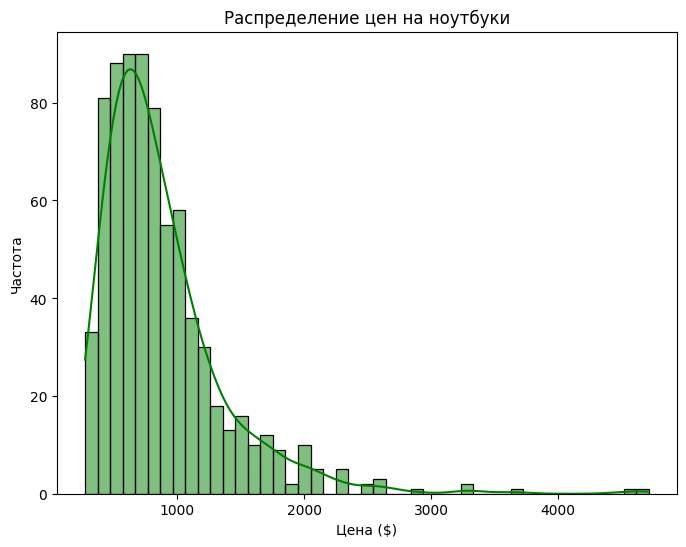

In [33]:
# Распределение цен
plt.figure(figsize=(8, 6))
sns.set_palette("Paired")
sns.histplot(df['Price'], kde = True, color = 'green')
plt.title('Распределение цен на ноутбуки')
plt.xlabel('Цена ($)')
plt.ylabel('Частота')
plt.show()


In [34]:
df['Price'].mode()[0]

np.float64(795.3)

In [35]:
df['Price'].mean()

np.float64(876.8640479360853)

In [36]:
df['Price'].median()

755.1

In [37]:
# Топ 10 брендов по количеству моделей
top_brands = df['Brand'].value_counts().head(10)
top_brands

,count
Brand,
Lenovo,181
HP,151
Asus,118
Dell,81
MSI,71
Acer,56
Samsung,20
Infinix,17
Apple,14


In [38]:
df.head()

,Model,Price,Rating,Generation,Core,Ram,SSD,Display,Graphics,OS,Warranty,Ram_numeric,Ram_value,Brand
0,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,572.7,70.0,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8 GB DDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels, Touch Screen",4 GB AMD Radeon RX 6500M,Windows 11 OS,1 Year Warranty,8,GB,HP
1,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,272.6,56.0,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8 GB LPDDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",Intel UHD Graphics,Windows 11 OS,1 Year Warranty,8,GB,Tecno
2,Lenovo V15 G4 ‎82YU00W7IN Laptop (AMD Ryzen 3 ...,306.7,55.0,7th Gen AMD Ryzen 3 7320U,"Quad Core, 8 Threads",8 GB LPDDR5 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",AMD Radeon Graphics,Windows 11 OS,1 Year Warranty,8,GB,Lenovo
3,Samsung Galaxy Book2 Pro 13 Laptop (12th Gen C...,795.3,60.0,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16 GB LPDDR5 RAM,512 GB SSD,"13.3 inches, 1080 x 1920 pixels",Intel Iris Xe Graphics,Windows 11 OS,1 Year Warranty,16,GB,Samsung
4,Xiaomi Redmi G Pro 2024 Gaming Laptop (14th Ge...,1170.3,78.0,14th Gen Intel Core i9 14900HX,"24 Cores (8P + 16E), 32 Threads",16 GB DDR5 RAM,1 TB SSD,"16.1 inches, 2560 x 1600 pixels",8 GB NVIDIA GeForce RTX 4060,Windows 11 OS,1 Year Warranty,16,GB,Xiaomi


In [39]:

# Топ 10 брендов и их средняя цена
# Общее количество брендов
brands_counts = df['Brand'].value_counts().reset_index()
# Средняя цена по всем брендам
avg_prices = df.groupby('Brand')['Price'].mean().round(1).reset_index()
# Обединение топ брендов со средней ценой
top_brands_avg_price = pd.merge(brands_counts, avg_prices, on='Brand').head(10)
top_brands_avg_price

,Brand,count,Price
0,Lenovo,181,797.6
1,HP,151,937.2
2,Asus,118,773.8
3,Dell,81,859.7
4,MSI,71,973.2
5,Acer,56,720.9
6,Samsung,20,1353.8
7,Infinix,17,498.5
8,Apple,14,2421.1
9,LG,7,1302.7


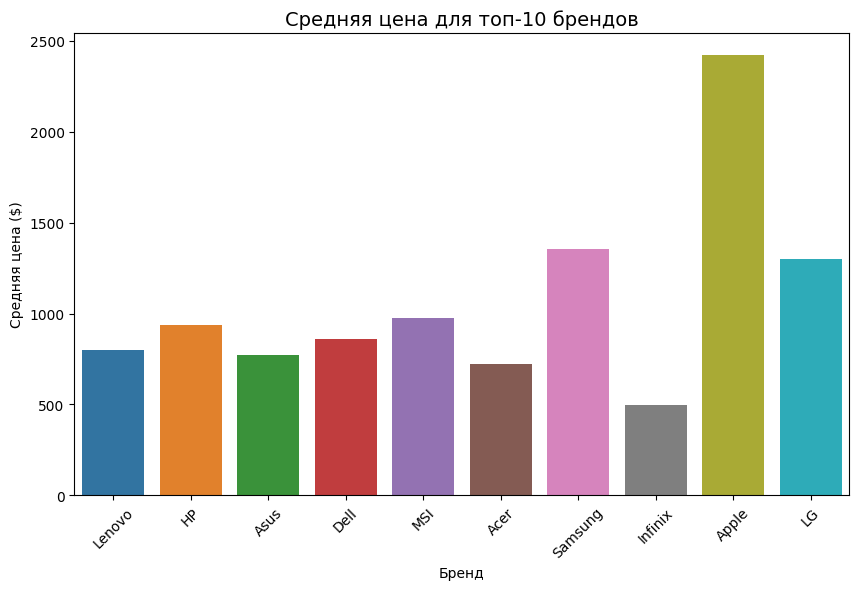

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_brands_avg_price, x="Brand", y="Price", palette="tab10")
plt.title("Средняя цена для топ-10 брендов", fontsize=14)
plt.xlabel("Бренд")
plt.ylabel("Средняя цена ($)")
plt.xticks(rotation=45)
plt.show()

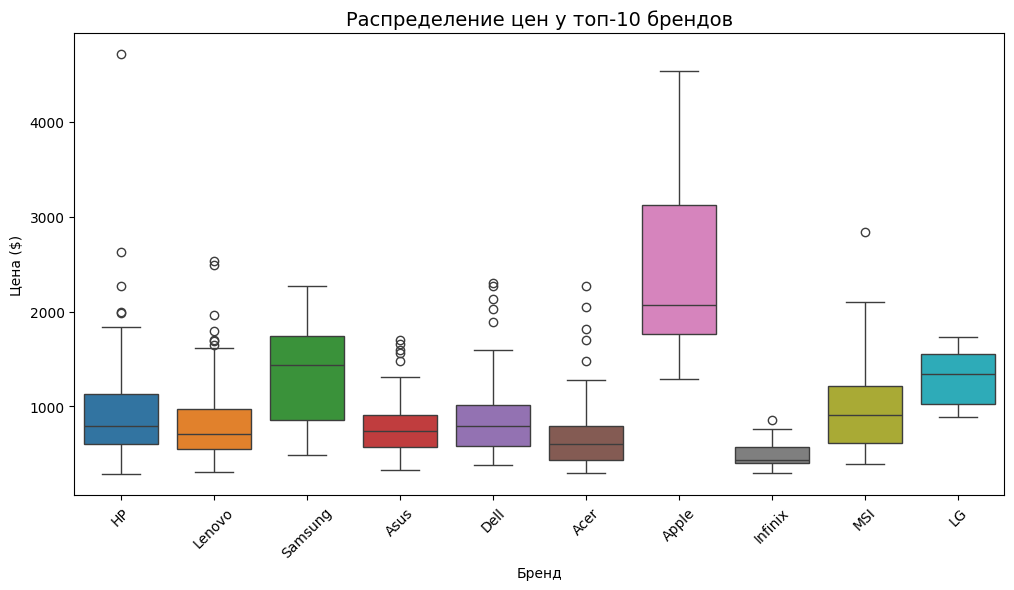

In [41]:
# Распределение цен на боксплоте
top_brands = df[df['Brand'].isin(top_brands_avg_price['Brand'])]

plt.figure(figsize=(12, 6))
sns.boxplot(data=top_brands, x="Brand", y="Price", palette="tab10")
plt.title("Распределение цен у топ-10 брендов", fontsize=14)
plt.xlabel("Бренд")
plt.ylabel("Цена ($)")
plt.xticks(rotation=45)
plt.show()

In [42]:
df['Brand'].value_counts()

,count
Brand,
Lenovo,181
HP,151
Asus,118
Dell,81
MSI,71
Acer,56
Samsung,20
Infinix,17
Apple,14


In [43]:
# Топ-бренды по распределению рейтинга
rating = df.groupby('Brand')['Rating'].mean().reset_index().sort_values(by='Rating', ascending=False)
rating

,Brand,Rating
16,Ninkear,73.000000
4,Colorful,70.000000
23,‎HP,70.000000
12,LG,68.857143
10,Huawei,68.000000
7,Gigabyte,67.250000
14,MSI,66.507042
6,Fujitsu,64.000000
8,HP,63.589404
2,Asus,62.398305


In [44]:
# Распределение рейтинга среди топ-брендов
# Топ 10 брендов и их средний рейтинг

# Средний рейтинг по всем брендам
avg_rating = df.groupby('Brand')['Rating'].mean().round(1).reset_index()
# Обединение топ брендов со средним рейтингом
top_brands_avg_rating = pd.merge(brands_counts, avg_rating, on='Brand').head(10)
top_brands_avg_rating

,Brand,count,Rating
0,Lenovo,181,60.4
1,HP,151,63.6
2,Asus,118,62.4
3,Dell,81,59.5
4,MSI,71,66.5
5,Acer,56,59.9
6,Samsung,20,62.0
7,Infinix,17,54.1
8,Apple,14,56.8
9,LG,7,68.9


In [45]:
laptops['Brand'] = laptops['Model'].apply(lambda x: x.split()[0])

In [46]:
laptops['Brand'][laptops['Rating'].isnull()].value_counts().head(10)

,count
Brand,
Lenovo,30
HP,24
MSI,21
Asus,14
Dell,14
Acer,14
Chuwi,6
Apple,4
Avita,4


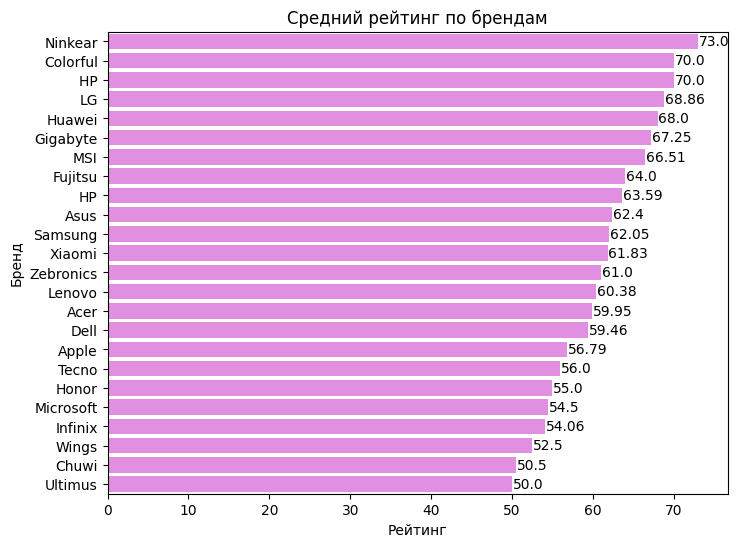

In [47]:
# Средний рейтинг по брендам
plt.figure(figsize=(8,6))
plt.title('Средний рейтинг по брендам')
sns.barplot(data=rating, x='Rating', y='Brand', color='violet')
for index, value in enumerate(rating['Rating'].round(2)):
    plt.text(value + 0.1, index, str(value), va='center')
plt.xlabel('Рейтинг')
plt.ylabel('Бренд')
plt.show()

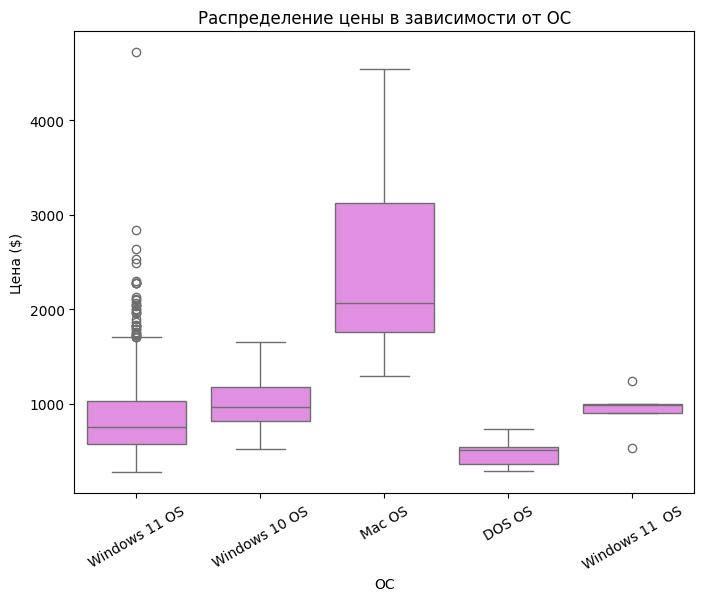

In [48]:
# Price distribution by top operating systems
top_os = df['OS'].value_counts().head(5).index
filtered_df = df[df['OS'].isin(top_os)]
plt.figure(figsize=(8,6))
plt.title('Распределение цены в зависимости от ОС')
sns.boxplot(x='OS', y='Price', data=filtered_df, color='violet')
plt.xlabel('ОС')
plt.ylabel('Цена ($)')
plt.xticks(rotation=30)
plt.show()

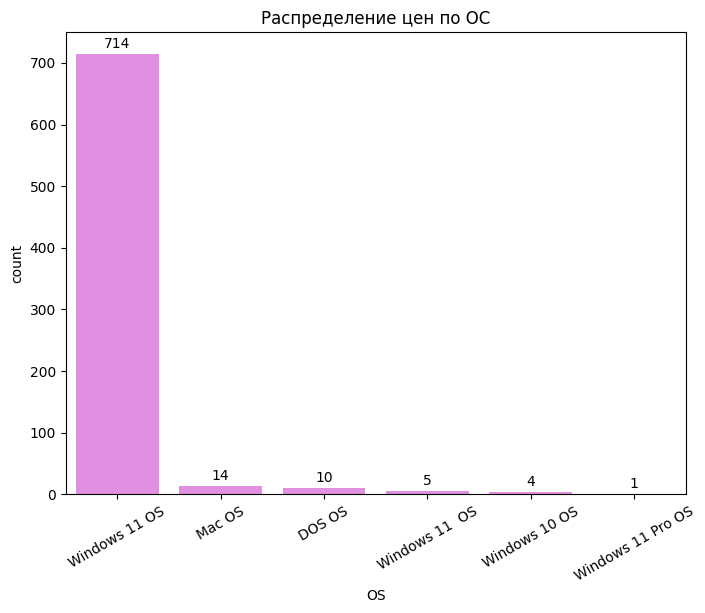

In [49]:
# Распредеение моделей по ОС
os = df['OS'].value_counts().reset_index().sort_values(by='count', ascending=False).head(6)
plt.figure(figsize=(8,6))
plt.title('Распределение цен по ОС')
sns.barplot(data=os, x='OS', y='count', color='violet')
for index, value in enumerate(os['count']):
    plt.text(index, value + 10, str(value), ha='center')
plt.xticks(rotation=30)
plt.show()

In [50]:
df

,Model,Price,Rating,Generation,Core,Ram,SSD,Display,Graphics,OS,Warranty,Ram_numeric,Ram_value,Brand
0,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,572.7,70.0,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8 GB DDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels, Touch Screen",4 GB AMD Radeon RX 6500M,Windows 11 OS,1 Year Warranty,8,GB,HP
1,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,272.6,56.0,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8 GB LPDDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",Intel UHD Graphics,Windows 11 OS,1 Year Warranty,8,GB,Tecno
2,Lenovo V15 G4 ‎82YU00W7IN Laptop (AMD Ryzen 3 ...,306.7,55.0,7th Gen AMD Ryzen 3 7320U,"Quad Core, 8 Threads",8 GB LPDDR5 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",AMD Radeon Graphics,Windows 11 OS,1 Year Warranty,8,GB,Lenovo
3,Samsung Galaxy Book2 Pro 13 Laptop (12th Gen C...,795.3,60.0,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16 GB LPDDR5 RAM,512 GB SSD,"13.3 inches, 1080 x 1920 pixels",Intel Iris Xe Graphics,Windows 11 OS,1 Year Warranty,16,GB,Samsung
4,Xiaomi Redmi G Pro 2024 Gaming Laptop (14th Ge...,1170.3,78.0,14th Gen Intel Core i9 14900HX,"24 Cores (8P + 16E), 32 Threads",16 GB DDR5 RAM,1 TB SSD,"16.1 inches, 2560 x 1600 pixels",8 GB NVIDIA GeForce RTX 4060,Windows 11 OS,1 Year Warranty,16,GB,Xiaomi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,Asus TUF Gaming A15 2023 FA577XU-LP041WS Gamin...,1568.1,75.0,7th Gen AMD Ryzen 9 7940HS,"Octa Core, 16 Threads",16 GB DDR4 RAM,1 TB SSD,"15.6 inches, 1920 x 1080 pixels",6 GB NVIDIA GeForce RTX 4050,Windows 11 OS,1 Year Warranty,16,GB,Asus
915,Asus Vivobook 16X 2023 K3605ZF-MB541WS Laptop ...,738.5,68.0,12th Gen Intel Core i5 12450H,"Octa Core (4P + 4E), 12 Threads",16 GB DDR4 RAM,512 GB SSD,"16 inches, 1920 x 1200 pixels",4 GB NVIDIA GeForce RTX 2050,Windows 11 OS,1 Year Warranty,16,GB,Asus
917,Acer Aspire 5 A514-56GM Gaming Laptop (13th Ge...,795.3,62.0,13th Gen Intel Core i7 1355U,"10 Cores (2P + 8E), 12 Threads",8 GB DDR4 RAM,512 GB SSD,"14 inches, 1920 x 1080 pixels",4 GB NVIDIA GeForce RTX 2050,Windows 11 OS,1 Year Warranty,8,GB,Acer
918,Lenovo IdeaPad Slim 5 82FG01B3IN Laptop (11th ...,623.9,63.0,11th Gen Intel Core i5 1135G7,"Quad Core, 8 Threads",16 GB DDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",Intel Iris Xe Graphics,Windows 11 OS,1 Year Warranty,16,GB,Lenovo


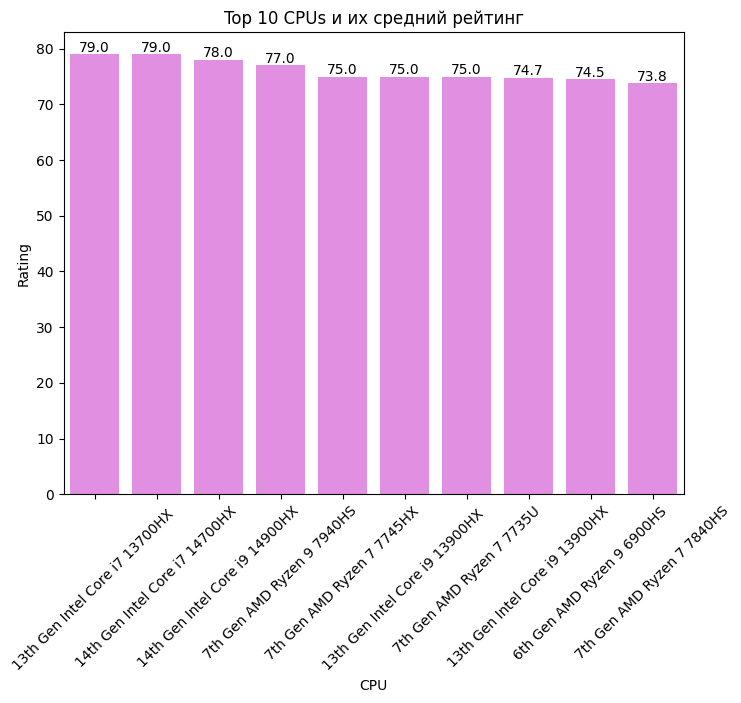

In [51]:
# Top 10 CPUs by average laptop rating
top_cpu = df.groupby('Generation')['Rating'].mean().round(1).sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(8,6))
plt.title('Top 10 CPUs и их средний рейтинг')
sns.barplot(data=top_cpu, x='Generation', y='Rating', color='violet')
plt.xlabel('CPU')
plt.ylabel('Rating')
plt.xticks(rotation=45)
for index, value in enumerate(top_cpu['Rating']):
    plt.text(index, value + 0.5, str(value), ha='center')
plt.show()

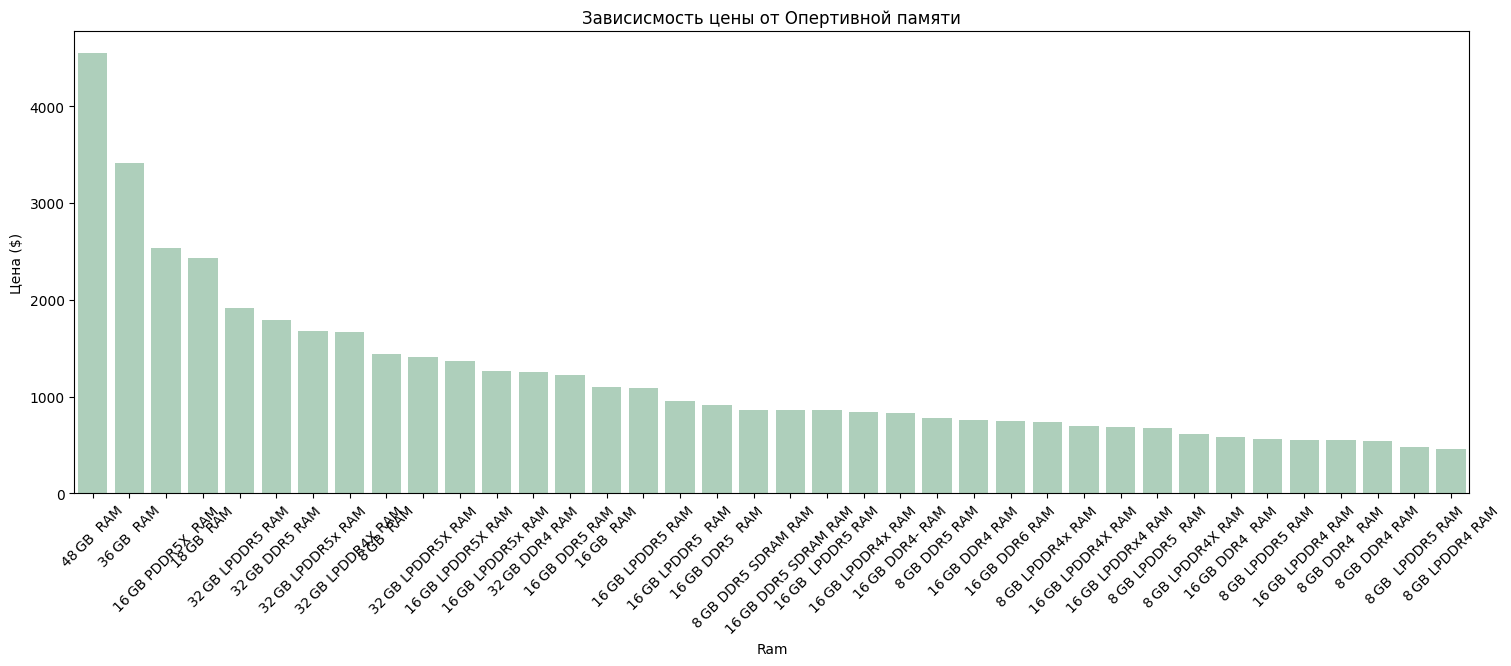

In [52]:
# 'Зависисмость цены от Опертивной памяти
avg_ram = df.groupby('Ram')['Price'].mean().round(0).sort_values(ascending=False).reset_index()
plt.figure(figsize=(18,6))
plt.title('Зависисмость цены от Опертивной памяти')
sns.barplot(data=avg_ram, x='Ram', y='Price', color='#A8D5BA')
plt.ylabel('Цена ($)')
plt.xticks(rotation=45)
plt.show()

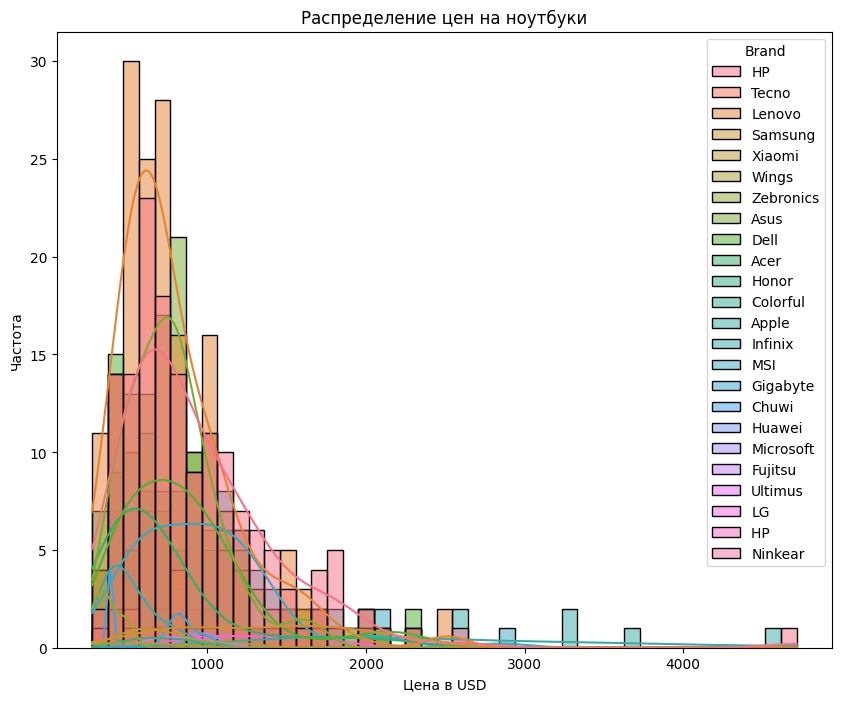

In [53]:
# Распределение цен по моделям
plt.figure(figsize=(10, 8))
sns.set_palette("bright")
sns.histplot(data = df, x='Price', kde = True, hue='Brand')
plt.title('Распределение цен на ноутбуки')
plt.xlabel('Цена в USD')
plt.ylabel('Частота')
plt.show()

In [54]:
# Top 10 brands by number of models
top_brands = df['Brand'].value_counts().reset_index().sort_values(by='count', ascending=False).head(10)

In [55]:
df

,Model,Price,Rating,Generation,Core,Ram,SSD,Display,Graphics,OS,Warranty,Ram_numeric,Ram_value,Brand
0,HP Victus 15-fb0157AX Gaming Laptop (AMD Ryzen...,572.7,70.0,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8 GB DDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels, Touch Screen",4 GB AMD Radeon RX 6500M,Windows 11 OS,1 Year Warranty,8,GB,HP
1,Tecno Megabook T1 Laptop (11th Gen Core i3/ 8G...,272.6,56.0,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8 GB LPDDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",Intel UHD Graphics,Windows 11 OS,1 Year Warranty,8,GB,Tecno
2,Lenovo V15 G4 ‎82YU00W7IN Laptop (AMD Ryzen 3 ...,306.7,55.0,7th Gen AMD Ryzen 3 7320U,"Quad Core, 8 Threads",8 GB LPDDR5 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",AMD Radeon Graphics,Windows 11 OS,1 Year Warranty,8,GB,Lenovo
3,Samsung Galaxy Book2 Pro 13 Laptop (12th Gen C...,795.3,60.0,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16 GB LPDDR5 RAM,512 GB SSD,"13.3 inches, 1080 x 1920 pixels",Intel Iris Xe Graphics,Windows 11 OS,1 Year Warranty,16,GB,Samsung
4,Xiaomi Redmi G Pro 2024 Gaming Laptop (14th Ge...,1170.3,78.0,14th Gen Intel Core i9 14900HX,"24 Cores (8P + 16E), 32 Threads",16 GB DDR5 RAM,1 TB SSD,"16.1 inches, 2560 x 1600 pixels",8 GB NVIDIA GeForce RTX 4060,Windows 11 OS,1 Year Warranty,16,GB,Xiaomi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,Asus TUF Gaming A15 2023 FA577XU-LP041WS Gamin...,1568.1,75.0,7th Gen AMD Ryzen 9 7940HS,"Octa Core, 16 Threads",16 GB DDR4 RAM,1 TB SSD,"15.6 inches, 1920 x 1080 pixels",6 GB NVIDIA GeForce RTX 4050,Windows 11 OS,1 Year Warranty,16,GB,Asus
915,Asus Vivobook 16X 2023 K3605ZF-MB541WS Laptop ...,738.5,68.0,12th Gen Intel Core i5 12450H,"Octa Core (4P + 4E), 12 Threads",16 GB DDR4 RAM,512 GB SSD,"16 inches, 1920 x 1200 pixels",4 GB NVIDIA GeForce RTX 2050,Windows 11 OS,1 Year Warranty,16,GB,Asus
917,Acer Aspire 5 A514-56GM Gaming Laptop (13th Ge...,795.3,62.0,13th Gen Intel Core i7 1355U,"10 Cores (2P + 8E), 12 Threads",8 GB DDR4 RAM,512 GB SSD,"14 inches, 1920 x 1080 pixels",4 GB NVIDIA GeForce RTX 2050,Windows 11 OS,1 Year Warranty,8,GB,Acer
918,Lenovo IdeaPad Slim 5 82FG01B3IN Laptop (11th ...,623.9,63.0,11th Gen Intel Core i5 1135G7,"Quad Core, 8 Threads",16 GB DDR4 RAM,512 GB SSD,"15.6 inches, 1920 x 1080 pixels",Intel Iris Xe Graphics,Windows 11 OS,1 Year Warranty,16,GB,Lenovo


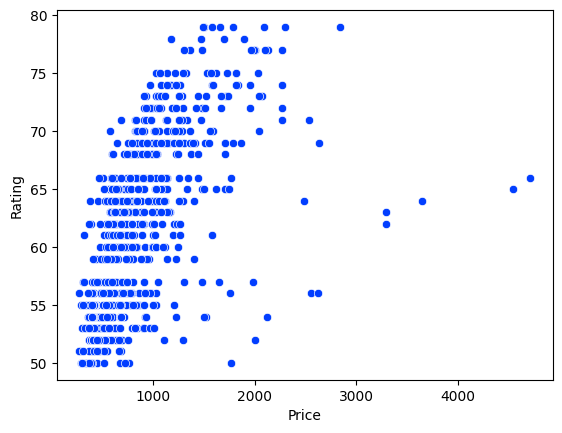

In [56]:
sns.scatterplot(data = df, x='Price', y = 'Rating')
plt.show()

<Axes: xlabel='Price'>

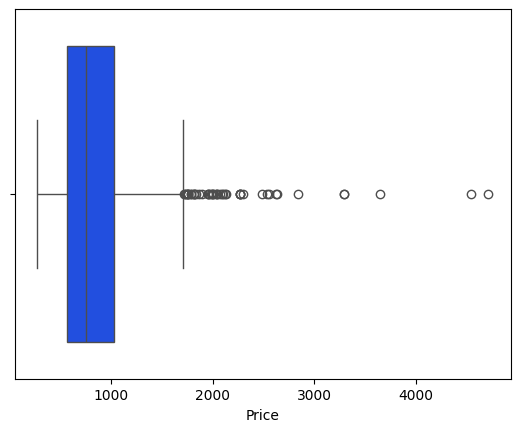

In [57]:
sns.boxplot(data = df, x = 'Price')

In [58]:
df['Price'].sort_values(ascending=False)

,Price
511,4715.9
70,4544.3
158,3644.2
355,3294.3
359,3291.9
...,...
98,290.7
10,284.0
148,283.0
168,272.6


<Axes: xlabel='Price'>

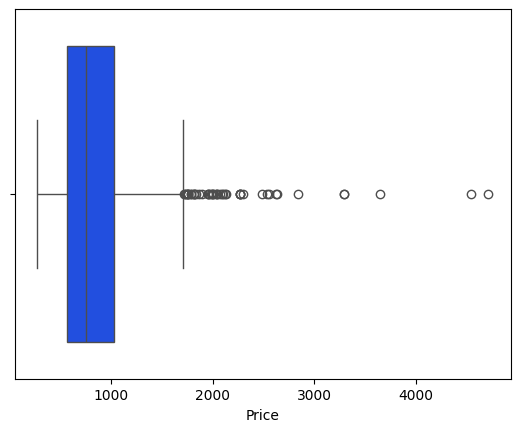

In [59]:
sns.boxplot(data = df, x = 'Price')

In [60]:
df = df.drop([511, 70])


In [61]:
df['Price'].sort_values(ascending=False)

,Price
158,3644.2
355,3294.3
359,3291.9
482,2840.8
634,2633.5
...,...
98,290.7
10,284.0
148,283.0
168,272.6


# Price Prediction Model

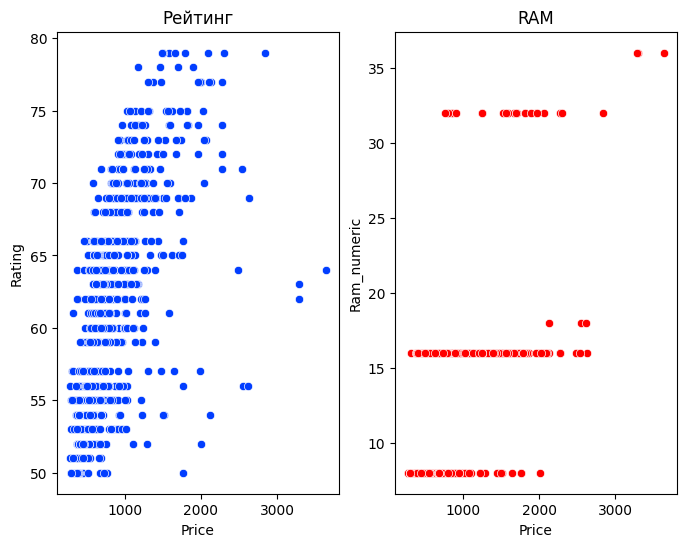

In [62]:
# избавиться от выбросов нужно
fig, axes = plt.subplots(1, 2, figsize=(8, 6))
axes[0].set_title('Рейтинг')
sns.scatterplot(data = df, x='Price', ax=axes[0], y = 'Rating')
axes[1].set_title('RAM')
sns.scatterplot(data = df, x='Price', y = 'Ram_numeric', ax=axes[1], color ='Red')
plt.show()

Linear Regression Model R^2 score: 0.4816795529818505


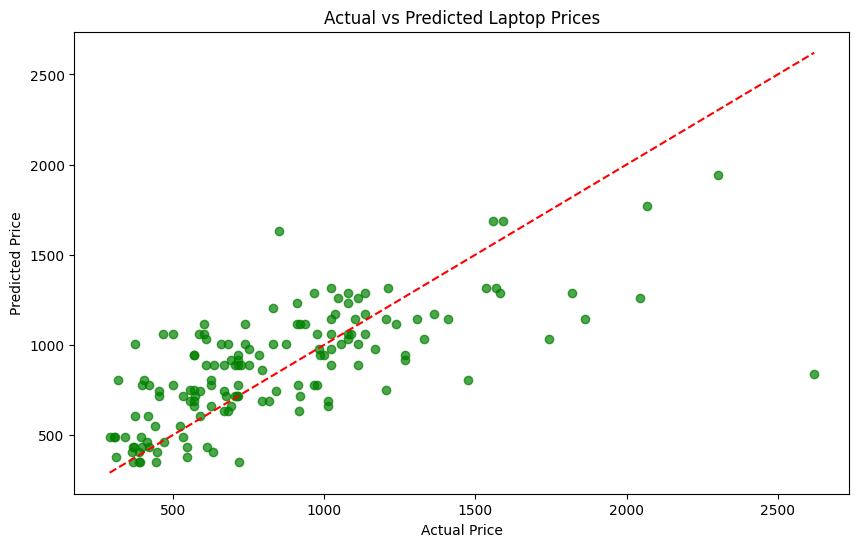

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import r2_score

predictor_features = ['Rating', 'Ram_numeric']

if any([col not in df.columns for col in predictor_features]):
    print('One or more predictor features are missing from the dataset. Check the column names.')
else:
    X = df[predictor_features].dropna()
    y = df.loc[X.index, 'Price']

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on the test set and calculate accuracy score (R^2)
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    print('Linear Regression Model R^2 score:', score)

    # Plotting the Actual vs Predicted Prices
    plt.figure(figsize=(10,6))
    plt.scatter(y_test, y_pred, alpha=0.7, color='green')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title('Actual vs Predicted Laptop Prices')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.show()